<a href="https://colab.research.google.com/github/MDyeimison/Neural-network-regression-with-TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


Creating data to view and fit

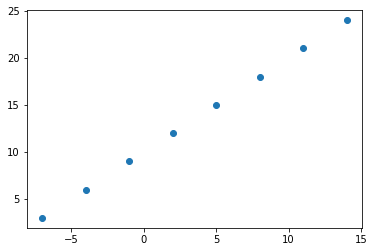

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize it
plt.scatter(x, y);

##imput and output shapes

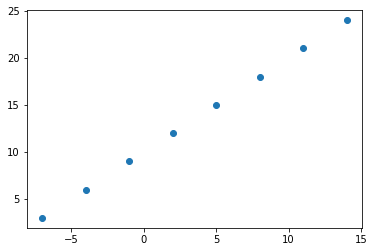

In [14]:
#create a demo tenor for house prediction problem
house_info = tf.constant(["bedroom", "batroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

input_shape = x.shape
output_shape = y.shape
input_shape, output_shape

#turn numpy arrays into tensors
X = tf.constant(x)
Y = tf.constant(y)
X, Y

plt.scatter(X, Y)

##Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learnig model.
2. **Compiling a model** - define the loss function (in other words, the functino which tells our model how wrong it is) and the optimizer (tells our model how to impove the patterns its learnig) and evaluetion metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & Y (features and labels)

In [15]:
#set random seed
tf.random.set_seed(42)

#1. create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2. compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #sgd is short for stochasitc gradient descent
              metrics=["mae"])
#3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 497ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748


In [16]:
#check out x and y
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [18]:
#try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [19]:
y_pred + 11

array([[23.71602]], dtype=float32)

##improving our model